In [3]:
# === Add project root (the folder that contains 'src/') to sys.path ===
import sys
from pathlib import Path

ROOT = next(p for p in [Path.cwd(), *Path.cwd().parents] if (p / "src").exists())
sys.path.insert(0, str(ROOT))
print("Project root added to sys.path ->", ROOT)

# (opsiyonel) kod değişikliklerini canlı yakalamak için:
%load_ext autoreload
%autoreload 2


Project root added to sys.path -> c:\Users\merts\Desktop\ml_basics\credit-scoring


In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path
from src.data_prep import load_raw, basic_clean
from src.utils import DATA_RAW
TARGET = "seriousdlqin2yrs"
pd.set_option("display.max_columns", 120)


In [5]:
df_raw = load_raw(DATA_RAW)
df = basic_clean(df_raw)
df.head()


,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30_59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60_89dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
display(df.info())
df.describe().T.head(20)


<class 'pandas.core.frame.DataFrame'>
Index: 149999 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   seriousdlqin2yrs                      149999 non-null  int64  
 1   revolvingutilizationofunsecuredlines  149999 non-null  float64
 2   age                                   149999 non-null  int64  
 3   numberoftime30_59dayspastduenotworse  149999 non-null  int64  
 4   debtratio                             149999 non-null  float64
 5   monthlyincome                         120268 non-null  float64
 6   numberofopencreditlinesandloans       149999 non-null  int64  
 7   numberoftimes90dayslate               149999 non-null  int64  
 8   numberrealestateloansorlines          149999 non-null  int64  
 9   numberoftime60_89dayspastduenotworse  149999 non-null  int64  
 10  numberofdependents                    146075 non-null  float64
dtypes: fl

None

,count,mean,std,min,25%,50%,75%,max
seriousdlqin2yrs,149999.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
revolvingutilizationofunsecuredlines,149999.0,6.048472,249.756203,0.0,0.029867,0.154176,0.559044,50708.0
age,149999.0,52.295555,14.771298,21.0,41.000000,52.000000,63.000000,109.0
numberoftime30_59dayspastduenotworse,149999.0,0.421029,4.192795,0.0,0.000000,0.000000,0.000000,98.0
debtratio,149999.0,353.007426,2037.825113,0.0,0.175074,0.366503,0.868257,329664.0
monthlyincome,120268.0,6670.226810,14384.733888,0.0,3400.000000,5400.000000,8249.000000,3008750.0
numberofopencreditlinesandloans,149999.0,8.452776,5.145964,0.0,5.000000,8.000000,11.000000,58.0
numberoftimes90dayslate,149999.0,0.265975,4.169318,0.0,0.000000,0.000000,0.000000,98.0
numberrealestateloansorlines,149999.0,1.018233,1.129772,0.0,0.000000,1.000000,2.000000,54.0
numberoftime60_89dayspastduenotworse,149999.0,0.240388,4.155193,0.0,0.000000,0.000000,0.000000,98.0


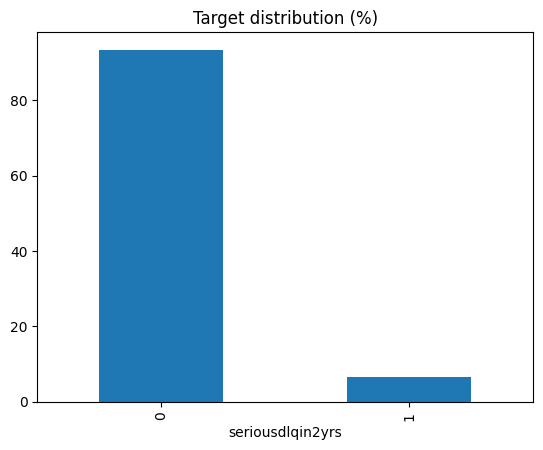

Pos rate (default %): 6.684044560297068


In [7]:
ax = df[TARGET].value_counts(normalize=True).mul(100).plot.bar()
ax.set_title("Target distribution (%)"); plt.show()
print("Pos rate (default %):", df[TARGET].mean()*100)


In [8]:
na = df.isna().mean().sort_values(ascending=False)
na[na>0].mul(100).round(2).head(20)


monthlyincome         19.82
numberofdependents     2.62
dtype: float64

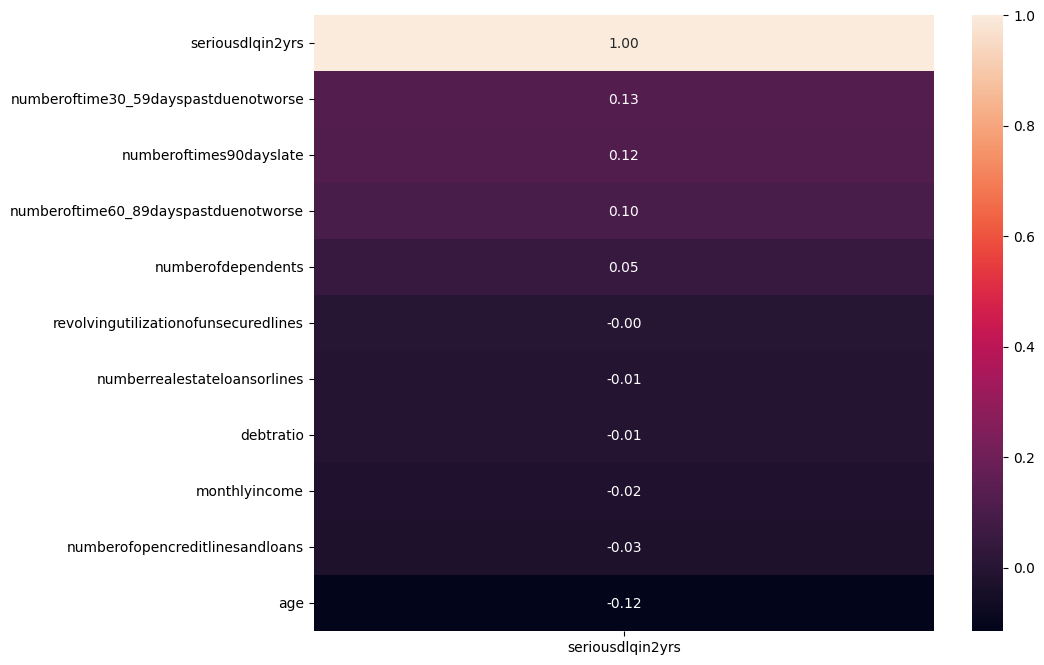

In [9]:
num_cols = [c for c in df.columns if c!=TARGET and pd.api.types.is_numeric_dtype(df[c])]
corr = df[num_cols+[TARGET]].corr(numeric_only=True)
plt.figure(figsize=(10,8)); sns.heatmap(corr[[TARGET]].sort_values(TARGET, ascending=False), annot=True, fmt=".2f"); plt.show()
